# Read and Process Boston Data

In [144]:
import requests
import io
import pandas as pd

def get_boston_data():
    boston_url = 'https://lib.stat.cmu.edu/datasets/boston'
    response = requests.get(boston_url)
    if response.status_code == 200:
        text_content = response.text
        # Process the text_content
        return text_content
    else:
        print("Error: Could not retrieve the file.")

boston_data = get_boston_data()

def get_columns(boston_data):
    result = []
    boston_data = boston_data.split('\n')
    columns = boston_data[7:21]
    for column in columns:
        result.append(column.split()[0])
    return result

columns = get_columns(boston_data)

def get_rows(boston_data):
    result = []
    boston_data = boston_data.split('\n')
    rows = boston_data[22:]
    for idx in range(0, len(rows) - 1, 2):
        values = rows[idx] + rows[idx + 1] 
        result.append(values)
    result = [row.split() for row in result]
    result = [[float(value) for value in row] for row in result]
    return result
  
rows = get_rows(boston_data)

def convert_to_df(columns, rows):
    df =  pd.DataFrame(rows, columns=columns)
    return df

boston_df = convert_to_df(columns, rows)

In [145]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# Task 2: Generate Descriptive Statistics and Vizualizations 

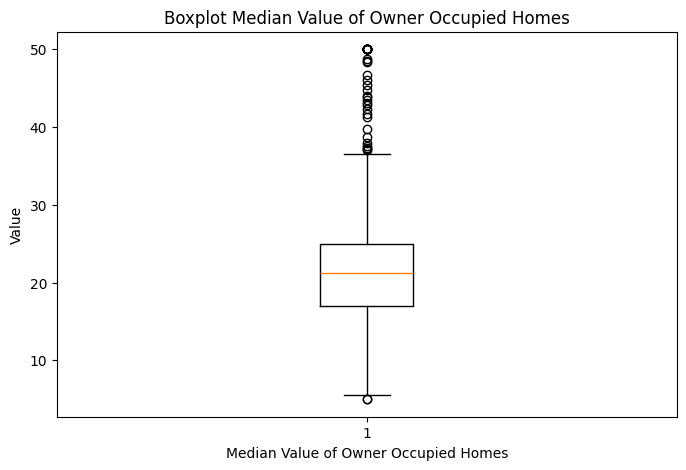

In [146]:
#1. "Median Value of owner occupied homes" provide a boxplot 
import matplotlib.pyplot as plt 

def boxplot_median_value():
    fig = plt.figure(figsize =(8, 5))
    plt.boxplot(boston_df['MEDV'])
    plt.xlabel('Median Value of Owner Occupied Homes')
    plt.ylabel('Value')
    plt.title('Boxplot Median Value of Owner Occupied Homes')
    plt.show()
boxplot_median_value()

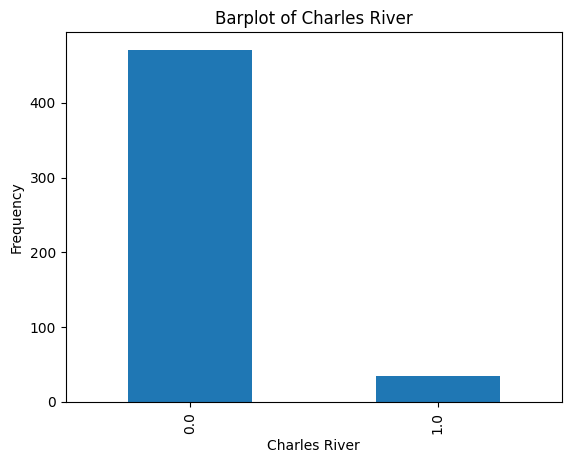

In [147]:
#Barplot of the Charles river variable
def barplot_charles_river():
    plt = boston_df['CHAS'].value_counts().plot(kind='bar')
    plt.set_xlabel('Charles River')
    plt.set_ylabel('Frequency')
    plt.set_title('Barplot of Charles River')
barplot_charles_river()

<Figure size 800x500 with 0 Axes>

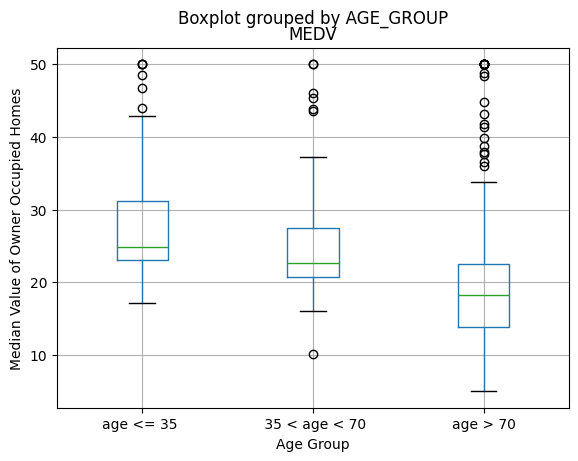

In [148]:
#3. Provide a boxplot for the MEDV variable vs the AGE variable

def boxplot_medv_age(boston_df):
    fig = plt.figure(figsize =(8, 5))
    boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['age <= 35 ', ' 35 < age < 70', 'age > 70'])
    boston_df.boxplot(column='MEDV', by='AGE_GROUP')
    plt.xlabel('Age Group')
    plt.ylabel('Median Value of Owner Occupied Homes')
    # plt.title('Boxplot of MEDV vs AGE')
    plt.show()

boxplot_medv_age(boston_df)

Text(0.5, 1.0, 'Scatter Plot of NOX vs Non-Retail Business Acres')

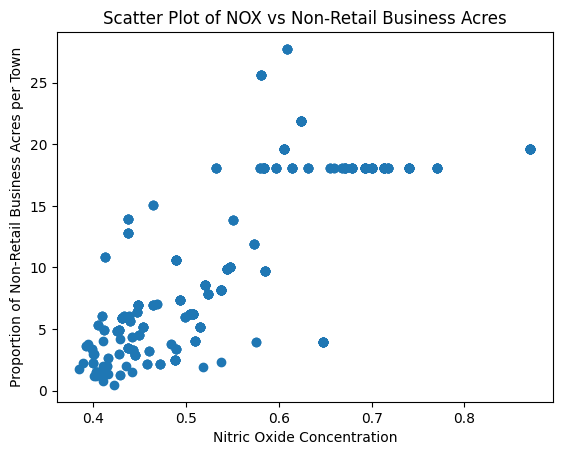

In [149]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

plt.scatter(boston_df['NOX'], boston_df['INDUS'])
plt.xlabel('Nitric Oxide Concentration')
plt.ylabel('Proportion of Non-Retail Business Acres per Town')
plt.title('Scatter Plot of NOX vs Non-Retail Business Acres')

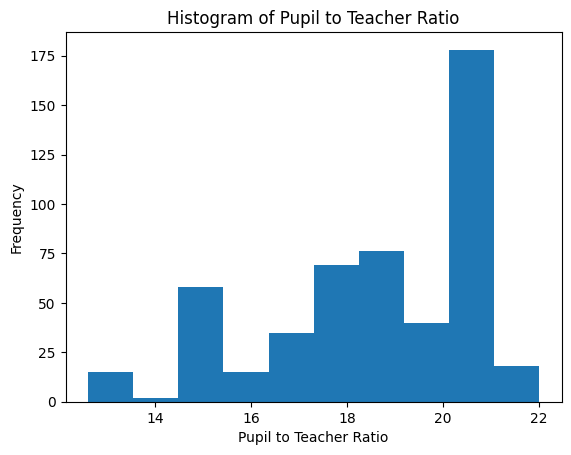

In [150]:
#5. Create a histogram for the pupil to teacher ratio variable

def histogram_ptratio(boston_df):
    plt.hist(boston_df['PTRATIO'])
    plt.xlabel('Pupil to Teacher Ratio')
    plt.ylabel('Frequency')
    plt.title('Histogram of Pupil to Teacher Ratio')
    plt.show()

histogram_ptratio(boston_df)

# Task 3: Use appropriate tests to answer the questions provided

In [151]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
from scipy.stats import ttest_ind

def t_test_medv_chas(boston_df):
    chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
    chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
    t_stat, p_val = ttest_ind(chas_0, chas_1)
    return t_stat, p_val

t_test_medv_chas(boston_df)

# Hypothesis:
# H0: There is no significant difference in median value of houses bounded by the Charles river
# H1: There is a significant difference in median value of houses bounded by the Charles river

# Conclusion:
# Since the p-value is less than 0.05, we reject the null hypothesis. There is a significant difference in median value of houses bounded by the Charles river.

(-3.996437466090509, 7.390623170519902e-05)

In [152]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

from scipy.stats import f_oneway

def anova_medv_age(boston_df):
    age_1 = boston_df[boston_df['AGE'] <= 35]['MEDV']
    age_2 = boston_df[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70)]['MEDV']
    age_3 = boston_df[boston_df['AGE'] >= 70]['MEDV']
    f_stat, p_val = f_oneway(age_1, age_2, age_3)
    return f_stat, p_val

anova_medv_age(boston_df)

# Hypothesis:
# H0: There is no significant difference in median value of houses for each proportion of owner occupied units built prior to 1940
# H1: There is a significant difference in median value of houses for each proportion of owner occupied units built prior to 1940

# Conclusion:
# Since the p-value is less than 0.05, we reject the null hypothesis. There is a significant difference in median value of houses for each proportion of owner occupied units built prior to 1940.

(36.40764999196599, 1.7105011022702984e-15)

In [153]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

from scipy.stats import pearsonr

def pearson_correlation_nox_indus(boston_df):
    corr, p_val = pearsonr(boston_df['NOX'], boston_df['INDUS'])
    return corr, p_val

pearson_correlation_nox_indus(boston_df)

# Hypothesis:
# H0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
# H1: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres

# Conclusion:
# Since the p-value is less than 0.05, we reject the null hypothesis. There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

(0.763651446920915, 7.913361061241171e-98)

In [154]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
import statsmodels.api as sm

def regression_analysis_medv_dis(boston_df):
    X = boston_df['DIS']
    y = boston_df['MEDV']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    return model.summary()

regression_analysis_medv_dis(boston_df)

# Hypothesis:
# H0: There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes
# H1: There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

# Conclusion:
# Since the p-value is less than 0.05, we reject the null hypothesis. There is an impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 25 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        23:45:57   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""